# Taller 3

## Métodos Numéricos, eres mi última esperanza

Agrupaciones afines al antiguo imperio galáctico se unieron para crear una nueva estación espacial de destrucción masiva, la **Estrella de la Muerte III**. El ejército de la república, al mando de la general Leia Organa, estuvo los últimos meses intentando conseguir los planos de la estación espacial sin éxito. Hace unos días, un agente encubierto logró llegar a ellos en una misión secreta y, utilizando el formato JPEG-2000, comenzó a transmitir los planos a la base espacial más cercana. En un momento lo descubrieron y la transmisión fue interrumpida. El formato utilizado transmite la imagen aumentando su resolución progresivamente. Dado que sólo tenemos un fragmento de la transmisión, la resolución de los planos es muy pobre y la general Organa nos pidió que los ampliemos para empezar a analizar debilidades en la nueva estación espacial y organizar un ataque.

Para realizar la ampliación de las imágenes de los planos, en este taller vamos a analizar tres tipos de zoom: vecino más cercano, interpolación bilineal y splines. Además vamos a estudiar el error producido al interpolar píxels, desde el punto de vista teórico, empírico y visual.


Primero, bajemos algunas imágenes

In [0]:

!pip install gdown
#https://drive.google.com/uc?id=file_id
!gdown -O circulos.png https://drive.google.com/uc?id=1dlEScU7exjAbvhbRuwXKZ-dQEoL0EsmN
!gdown -O deathstar.png https://drive.google.com/uc?id=1YxMCK3JwkDbPGASqsU1dMxwr9Xcw-0bl
!gdown -O chessboard.jpg https://drive.google.com/uc?id=15lTVFibFhv414ADvkIwmQ-VZLHysGr_W
!gdown -O tablero-m2.png https://drive.google.com/uc?id=10fiHDaIUudRglfbxa_sU2OzBINxbqLa2
!gdown -O tablero-m3.png https://drive.google.com/uc?id=1ukLZIxnn_75rOhztcHqCiqHaHl0F09Zq
!gdown -O tablero.png https://drive.google.com/uc?id=1eioxGxu9s5oAjtBGI5ilxQS6AWIScCwH
!gdown -O tablero-m1.png https://drive.google.com/uc?id=1xXXGUyoqft-bzK_3RF9pTgjrTWJL84pX
!gdown -O naturaleza.jpg https://drive.google.com/uc?id=1AEsPt4kES5-V2c2J36LX6DxZtWFA5pDD

Downloading...
From: https://drive.google.com/uc?id=1dlEScU7exjAbvhbRuwXKZ-dQEoL0EsmN
To: /content/circulos.png
100% 624k/624k [00:00<00:00, 41.3MB/s]
Downloading...
From: https://drive.google.com/uc?id=1YxMCK3JwkDbPGASqsU1dMxwr9Xcw-0bl
To: /content/deathstar.png
100% 807k/807k [00:00<00:00, 52.1MB/s]
Downloading...
From: https://drive.google.com/uc?id=15lTVFibFhv414ADvkIwmQ-VZLHysGr_W
To: /content/chessboard.jpg
100% 29.6k/29.6k [00:00<00:00, 55.5MB/s]
Downloading...
From: https://drive.google.com/uc?id=10fiHDaIUudRglfbxa_sU2OzBINxbqLa2
To: /content/tablero-m2.png
100% 1.92k/1.92k [00:00<00:00, 1.62MB/s]
Downloading...
From: https://drive.google.com/uc?id=1ukLZIxnn_75rOhztcHqCiqHaHl0F09Zq
To: /content/tablero-m3.png
100% 17.8k/17.8k [00:00<00:00, 32.4MB/s]
Downloading...
From: https://drive.google.com/uc?id=1eioxGxu9s5oAjtBGI5ilxQS6AWIScCwH
To: /content/tablero.png
100% 26.1k/26.1k [00:00<00:00, 23.7MB/s]
Downloading...
From: https://drive.google.com/uc?id=1xXXGUyoqft-bzK_3RF9pTgjrTWJ

## Ejercicio 1

Seleccione la opción correcta. Sea $f: \mathbb{R} \rightarrow \mathbb{R}$ y sea $p$ un polinomio interpolador de $f$ en $\{x_0\dots x_n\}$. Si el error cometido al interpolar es nulo, entonces:

1. $f(x) = p(x) \ \ \forall x\in \mathbb{R}$
2. $f(x) = p(x) \ \ \forall x\in [x_0,x_n]$
3. Ninguna de las anteriores.


<font color=red>Ingrese su respuesta aquí</font>
2


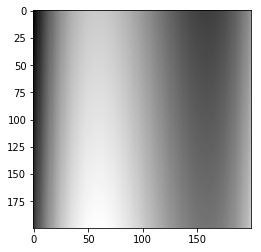

In [0]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np

plt.rcParams['image.interpolation'] = 'none'

def my_image(x, y):
    c = 6.375e-3
    g = c * ((x ** 3) / 24 - (55/4) * x ** 2 + 1200 * x)
    h = 0.255 * y
    return g + h

img = np.array([[my_image(x+1, y+1) for x in range(0, 200)] for y in range(0, 200)])

plt.imshow(img, cmap="gray")

## Ejercicio 2

Dada la imagen $f:[1,200]\times[1,200]\rightarrow[0,255]$, $f(x,y) = g(x) + h(y)$, siendo:
    $$ g(x) = c \left(\frac{1}{24} x^3 - \frac{55}{4} x^2 + 1200 x\right), \ \ \ \ \ \text{ con } c=6,375\times 10^{-3} $$
    $$ h(y) = 0.255 y $$



Definimos la imagen digital $I$ como $I(x,y) = f(x,y)$ para $x,y\in\{1,\dots, 200\}$. Observar que la imagen es de $200\times 200$ 

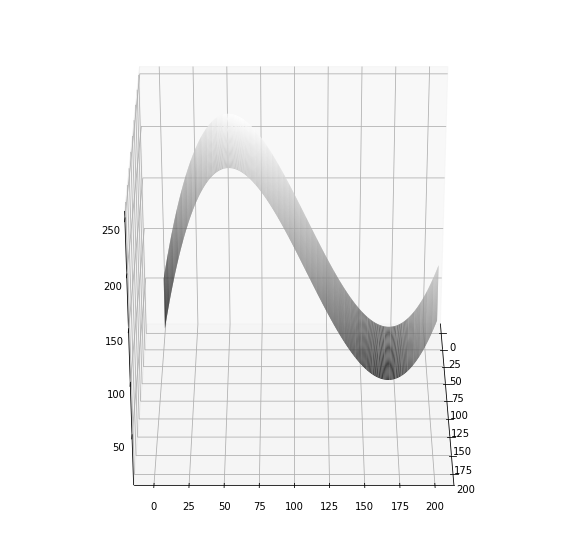

In [0]:
# This import registers the 3D projection, but is otherwise unused.
from mpl_toolkits.mplot3d import Axes3D  # noqa: F401 unused import

fig = plt.figure(figsize=(10, 10))
ax = fig.gca(projection='3d')

ax.plot_surface(range(0, 200), range(0, 200), img, cmap="gray")

# variar el angulo
angle = 0 
ax.view_init(30, angle)

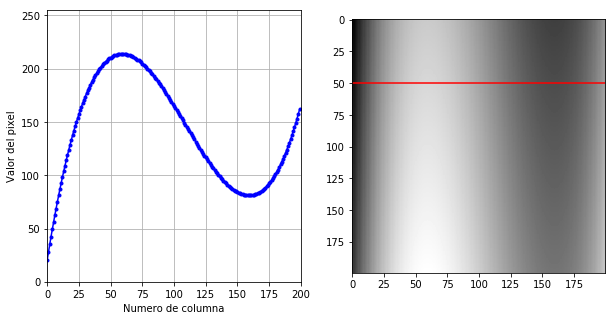

In [0]:
# probar con el chessboard
# img = io.imread("chessboard.jpg")

# variar el número de fila a plotear
ifil = 50
sig = img[ifil]


plt.figure(figsize=(10, 5))
# ax = fig.gca(projection='3d')


plt.subplot(1,2,1)
plt.plot(sig,'b.-')
plt.grid()
plt.xlabel("Numero de columna")
plt.ylabel("Valor del pixel")
plt.ylim((0,255))
plt.xlim((0,img.shape[1]))

plt.subplot(1,2,2)
plt.imshow(img, cmap="gray")
plt.axhline(y=ifil,color='red')


Se desea aplicar zoom de 2X a $I$ (es decir, ampliarla al doble de filas y doble de columnas) utilizando el método \emph{Bilineal} (IFL\footnote{IFL: Interpolación Fragmentaria Lineal} por columnas y luego por filas).

**a)** Sea $\tilde{x}\in\{1,\dots, 200\}$ una columna de la imagen. Se realiza IFL de los puntos 
\begin{equation*}
\begin{array}{c|cccc}
y_i & 1 & 2 & \dots & 200 \\ \hline
I(\tilde{x},y_i) & I(\tilde{x},1) & I(\tilde{x},2) & \dots & I(\tilde{x},200) \\ 
\end{array}
\end{equation*} 
(i.e., a lo largo de cada columna). Observar que $I(\tilde{x},y_i) = f(\tilde{x},y_i)$.
      
Calcular el módulo del error cometido $|E_{\tilde{x}}(y)|$  para todo $y\in[1,200]$.


<font color=red>Rta:</font> Da cero, porque la derivada segunda de f(x,y) respecto a y es 0, luego la formula del error se puede acotar por 0.




Luego de realizar IFL a lo largo de cada columna, obtenemos una nueva imagen $I'(x,y)$ definida para $x\in\{1\dots 200\}$, $y\in\{1; 1.5; 2; 2.5; \dots; 199,5 200\}$ (i.e., se duplica la cantidad de filas de la imagen $I$).


**b)** Probar que $I'(x,y) = f(x,y)$ para todo $x,y$ donde $I'$ está definida.

*Sugerencia: Tener en cuenta el resultado del ítem anterior y la respuesta al ejercicio 1.*
      


<font color=red>Rta:</font>
Segun el ejercicio anterior el error es 0 y segun el ejercicio 1, 
 $f(x) = p(x) \ \ \forall x\in [x_0,x_n]$.
 Tomo un punto, si es un punto original de I, por definicion de I, ese punto es igual a f, segun su definicion en el enunciado del ejercicio 2.
 Si fue uno que creamos con la interpolacion, por la definicion del polinomio interpolador, el polinomio evaluado en el (x,y) es igual a f(x,y) en el intervalo de [0;200].
 
 


**c)** Sea $\tilde{y}$ una fila de $I'$.  Se realiza IFL de los puntos 
\begin{equation*}
\begin{array}{c|cccc}
x_i & 1 & 2 & \dots & 200 \\ \hline
I'(x_i,\tilde{y}) & I'(1,\tilde{y}) & I'(2,\tilde{y}) & \dots & I'(200,\tilde{y}) \\ 
\end{array}
\end{equation*} 
(i.e., a lo largo de cada fila).

Acotar el módulo del error cometido $|E_{\tilde{y}}(x)|$  para todo $x\in[1,200]$.
      
      


<font color=red>Rta:</font> 1/2


**d)** A partir de los resultados previos, acotar el error absoluto cometido en cada píxel de la interpolación bilineal de $I$.


<font color=red>Rta:</font> 1/2


## Ejercicio 3

Antes que nada, veamos las imágenes que tenemos

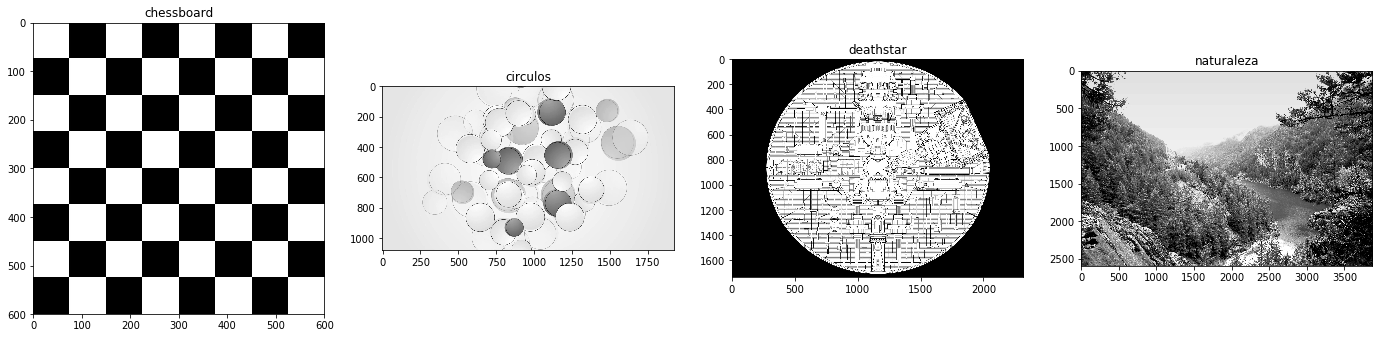

In [0]:
# Lectura de una imagen del disco
from skimage import io
from skimage.color import rgb2gray
import os

files = ["chessboard.jpg", "circulos.png", "deathstar.png", "naturaleza.jpg"]


plt.figure(figsize=(24, 10))


images = {}

for i, filename in enumerate(files):
  # Saco la extensión
  name = os.path.splitext(filename)[0]
  

  img = io.imread(filename)
  
  
  # Naturaleza es la única imagen a color entonces la paso a BN
  if name == "naturaleza":
     img = rgb2gray(img)

  # Las otras son BN pero en formato a color (los 3 canales iguales)
  if len(img.shape) == 3:
      img = img[:,:,0]
   
  images[name] = img
  plt.subplot(1, 4, i + 1)
  plt.imshow(img, cmap="gray")
  plt.title(name)
    
  
    

### Recortar una región de la imagen

Usamos el "slice" de numpy como si fuera una matriz común y corriente

(500, 320)


<Figure size 1728x720 with 0 Axes>

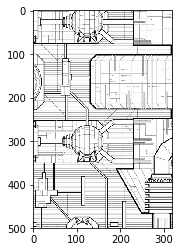

<Figure size 1728x720 with 0 Axes>

In [0]:

img_small = images["deathstar"][700:1200,700:1020]

print(img_small.shape)
plt.imshow(img_small,cmap="Greys_r")
plt.figure(figsize=(24, 10))


*a)* Implementar la función interpolate_image, que dada una imagen img de tamaño $H \times W$ y un número $factor$ nos devuelve una imagen $factor$ veces más grande, interpolada fragmentariamente primero por filas, y luego por columnas

Usaremos 3 tipos de interpolación:

* `linear`
* `cubic`: splines
* `nearest`: Vecino más cercano

Para efectuar la interpolación propiamente dicha, usaremos la función [interp1d](https://docs.scipy.org/doc/scipy/reference/generated/scipy.interpolate.interp1d.html) de `scipy`. Ver la documentación para 

**Obs** la imagen de salida tendrá forma $(H - 1) factor \times (W-1) factor$  
ya que no interpolaremos por fuera de la última fila y la última columna

**Obs 2:** Usar la función `np.linspace` para generar el arreglo de x correspondiente

In [0]:
import numpy as np
from scipy.interpolate import interp1d
x =np.linspace(0, 10, num=6)
y = np.exp(x)

f = interp1d(x,y,'linear')

xnew = np.linspace(0,10,num=20)

[1.00000000e+00 2.68133055e+00 4.36266110e+00 6.04399166e+00
 9.87374525e+00 2.22971910e+01 3.47206368e+01 4.71440826e+01
 9.13171651e+01 1.83114703e+02 2.74912241e+02 3.66709778e+02
 8.10407087e+02 1.48870424e+03 2.16700140e+03 2.84529856e+03
 6.99053858e+03 1.20025143e+04 1.70144901e+04 2.20264658e+04]


In [0]:
 %matplotlib inline
import numpy as np
from scipy.interpolate import interp1d



def interpolate_image(img, factor=2, kind='linear'):
    height = img.shape[0]
    width = img.shape[1]
    
    img_interp = np.zeros(((height-1) * factor+1, 
                           (width-1) * factor+1))
    img_interp[::factor, ::factor] = img
    

    for i in range(height):
        """
        Interpolación por filas:
        
        Escribir código acá
        """
        fila = img[i]
        x = np.linspace(0, width-1, num=width) 
        f = interp1d(x,fila,kind=kind)
        nueva = np.linspace(0, width-1, num=img_interp.shape[1]) 
        ynew = f(nueva)
        
        img_interp[i*factor] = ynew

    # Hasta acá no tiene que haber ninguna fila múltiplo de factor con norma 0
    # assert(all(not np.isclose(np.linalg.norm(img_interp[i]), 0) for i in range(0, img_interp.shape[0], factor)))
    # Todas las que no son múltiplo de factor tienen que tener norma 0
    # assert(all(np.isclose(np.linalg.norm(img_interp[i]), 0) for i in range(0, img_interp.shape[0]) if i % factor != 0))

    for j in range(img_interp.shape[1]):        
        """
        Interpolación por columnas
        
        
        Escribir código acá
        """
        x = np.linspace(0, height-1, height)
        y = img_interp[::factor,j]
        f = interp1d(x,y,kind=kind)
        nueva = np.linspace(0, height-1, num=img_interp.shape[0]) 
        ynew = f(nueva)
        
        img_interp[:, j] = ynew
    ## Clippeo valores fuera de 0 y 255
    img_interp = np.maximum(img_interp, 0)
    img_interp = np.minimum(img_interp, 255)
    
    return img_interp


Probemos cómo anda nuestra interpolación


Text(0.5, 1.0, 'Spline')

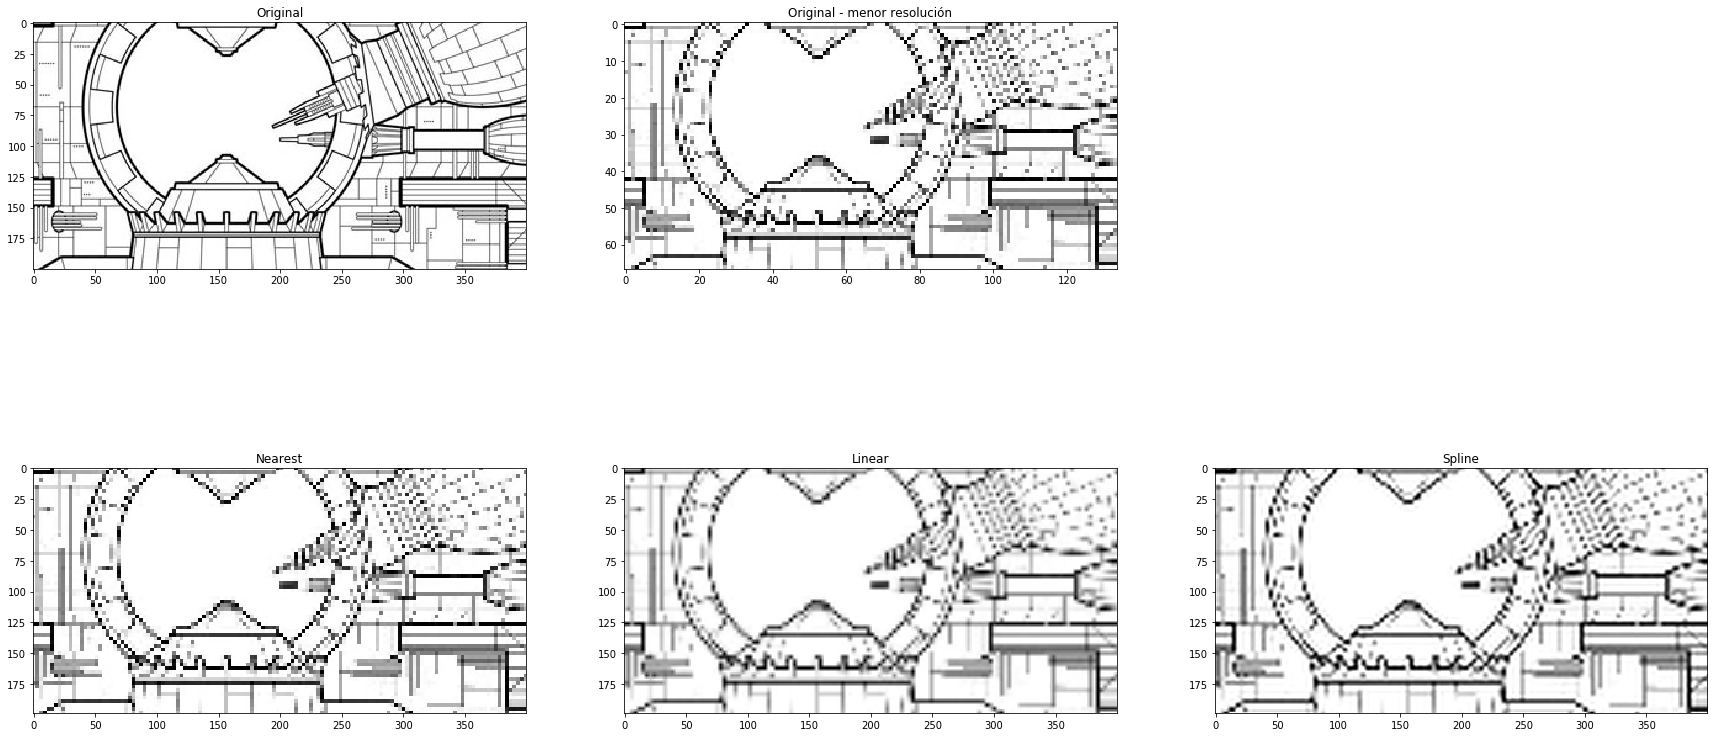

In [0]:
plt.figure(figsize=(30, 15))

factor = 3

original = images["deathstar"][800:1000, 1000:1400]

downsampled_orig = original[::factor, ::factor]



plt.subplot(2, 3, 1)
plt.imshow(original, cmap="gray", interpolation='none', aspect='equal')
plt.title("Original")

plt.subplot(2, 3, 2)
plt.imshow(downsampled_orig, cmap="gray", interpolation='none', aspect='equal')
plt.title("Original - menor resolución")


plt.subplot(2, 3, 4)
nearest_interp = interpolate_image(downsampled_orig, factor=factor, kind='nearest')
plt.imshow(nearest_interp, cmap="gray", )
plt.title("Nearest")


plt.subplot(2, 3, 5)
linear_interp = interpolate_image(downsampled_orig, factor=factor, kind='linear')
plt.imshow(linear_interp, cmap="gray", interpolation='none', aspect='equal')
plt.title("Linear")



plt.subplot(2, 3, 6)
spline_interp = interpolate_image(downsampled_orig, factor=factor, kind='cubic')
plt.imshow(spline_interp, cmap="gray", )
plt.title("Spline")


In [0]:
original.shape, linear_interp.shape

((200, 400), (199, 400))

**3.b)**

Utilizando las imágenes provistas (y pudiendo recortarlas como fue antes mostrado) encontrar:       
    
 - Un ejemplo donde el método Splines tenga el mejor $PSNR$.
 - Un ejemplo donde el método Bilineal tenga el mejor $PSNR$.
 - Un ejemplo donde el método Vecino más Cercano tenga $ECM = 0$ (sin error).
 
    
 Indicar para cada caso:
 
- La imagen que fue utilizada.
- La posición del recorte seleccionado $(x,y,ancho,alto)$.
- El nivel de zoom que fue aplicado (2X, 3X, ...).
- El recorte original y el zoom de cada método (por ejemplo ver Figura \ref{ejercicioDeduccion}).
- Los valores de $\sqrt{ECM}$ y $PSNR$ de cada uno.
  
    
¿Se corresponde el valor de $PSNR$ con la calidad visual percibida (considerando artifacts)?.



In [0]:
def ecm(img1, img2):
    return np.mean( (img1 - img2) ** 2 )

def psnr(img1, img2):
    assert(img1.shape == img2.shape)
    mse = ecm(img1.astype(float), img2.astype(float))
    if np.isclose(mse, 0):
        return 100
    PIXEL_MAX = 255.0
    return 10 * np.log10((PIXEL_MAX**2) / mse)

Acá pueden elegir la imagen, y ver los 3 tipos de interpolado y sus PSNR/ECM

(200, 200)
(dtype('uint8'), dtype('float64'))
(dtype('uint8'), dtype('float64'))
(dtype('uint8'), dtype('float64'))


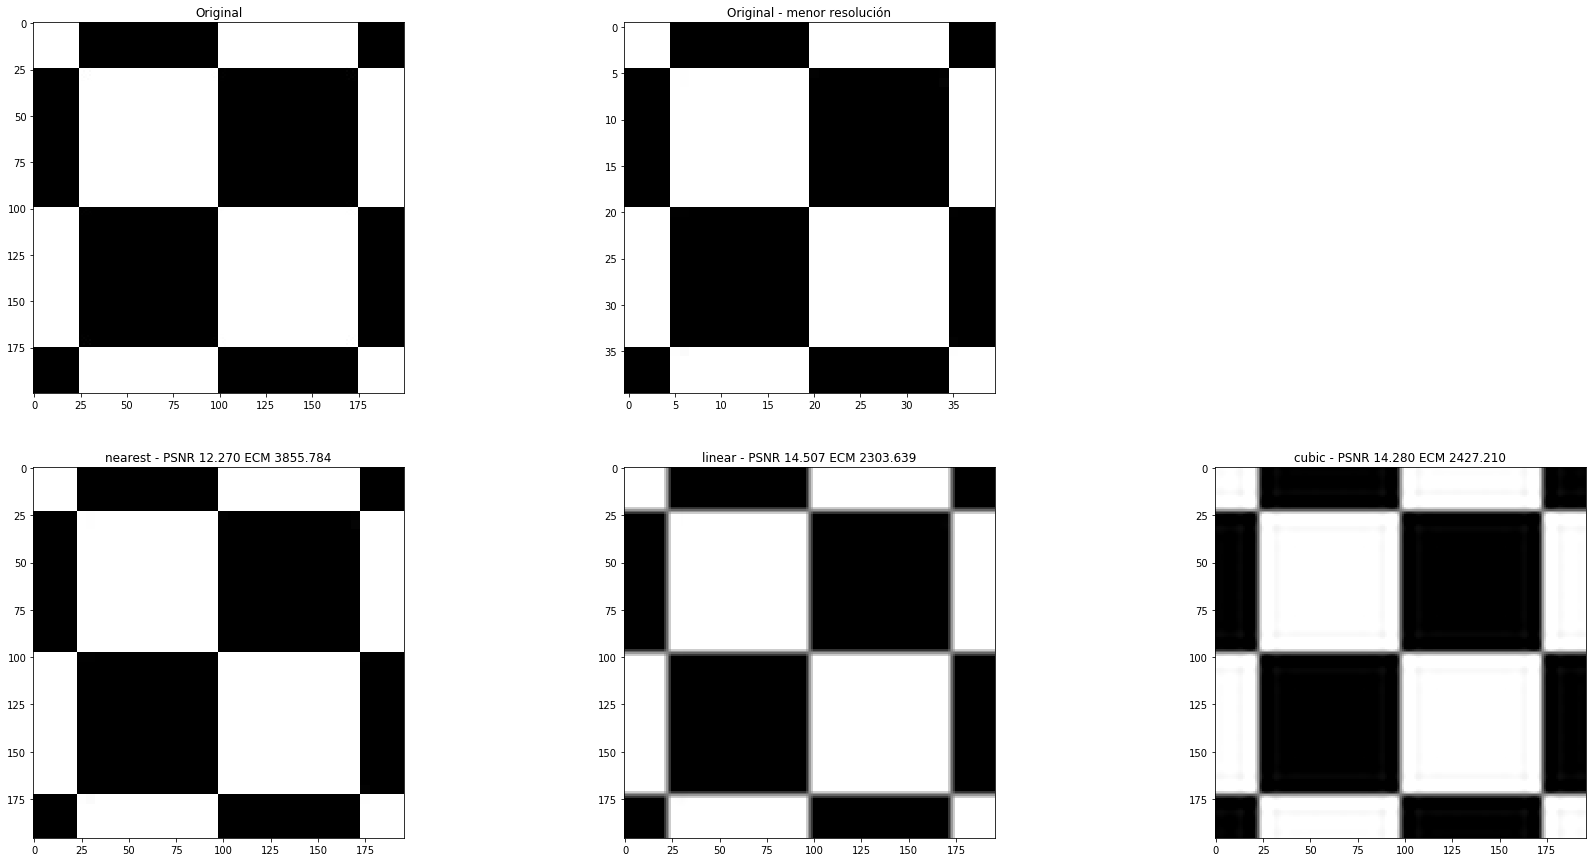

In [0]:
plt.figure(figsize=(30, 15))


factor = 5

original = images["chessboard"][200:400, 200:400]
#original = images["naturaleza"][2000:2200, 2000:2200]
print(original.shape)


downsampled_orig = original[::factor, ::factor]



plt.subplot(2, 3, 1)
plt.imshow(original, cmap="gray", interpolation='none', aspect='equal')
plt.title("Original")

plt.subplot(2, 3, 2)
plt.imshow(downsampled_orig, cmap="gray", interpolation='none', aspect='equal')
plt.title("Original - menor resolución")

def plot_method(factor, kind):
    interpolated = interpolate_image(downsampled_orig, factor=factor, kind=kind)
    plt.imshow(interpolated, cmap="gray", )
    orig_cut = original[:interpolated.shape[0], :interpolated.shape[1]]
    print((orig_cut.dtype, interpolated.dtype))
    plt.title(
        "{} - PSNR {:.3f} ECM {:.3f}".format(
        kind,
        psnr(interpolated, orig_cut), 
        ecm(interpolated, orig_cut))
    )
    


plt.subplot(2, 3, 4)
plot_method(factor, 'nearest')

plt.subplot(2, 3, 5)
plot_method(factor, 'linear')


plt.subplot(2, 3, 6)
plot_method(factor, 'cubic')


## Ejercicio 4

Se aplicaron los tres métodos de zoom a un recorte de un tablero. Analice las tres imágenes e indique a qué método corresponde cada una. Justifique su elección.

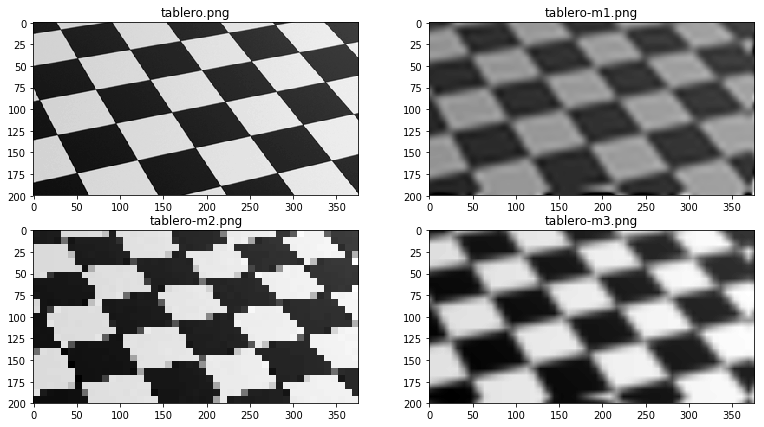

In [0]:
plt.figure(figsize=(13, 7))

for i, filename in enumerate(["tablero.png", "tablero-m1.png", "tablero-m2.png", "tablero-m3.png"]):
    
    img = io.imread(filename)
    plt.subplot(2, 2, i+1)
    plt.imshow(img, cmap="gray")
    plt.title(filename)


<font color=red>Rta:</font>
Original , Linear
Nearest , Cubic



## Ejercicio 5

En base al análisis realizado, ¿qué método utilizaría en los planos de la estrella de la muerte? Justifique su respuesta.

<font color=red>Rta:</font> Romi dice Nearest, Nico dice ninguno, porque es una ortiva.
